<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products with sell more. 

## Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd

In [2]:
past = pd.read_csv('../dat/past.csv.gz')

In [3]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

In [4]:
past.head().transpose()

,0,1,2,3,4
product_id,5.866936e+06,5.647110e+06,5.790472e+06,5.811598e+06,5.846363e+06
user_id,5.618978e+08,5.326529e+08,4.578109e+08,4.612641e+08,5.157993e+08
NumOfEventsInJourney,1.333333e+00,2.250000e+00,1.000000e+00,1.500000e+00,1.875000e+00
NumSessions,1.333333e+00,1.500000e+00,1.000000e+00,1.500000e+00,1.375000e+00
interactionTime,5.550000e+03,2.755650e+04,0.000000e+00,1.315325e+05,1.105588e+04
maxPrice,1.584000e+01,5.800000e+00,6.272500e+00,5.560000e+00,4.086250e+00
minPrice,1.584000e+01,5.565000e+00,6.272500e+00,5.560000e+00,4.086250e+00
NumCart,0.000000e+00,1.250000e+00,2.500000e-01,2.500000e-01,5.000000e-01
NumView,1.333333e+00,2.500000e-01,7.500000e-01,1.000000e+00,1.000000e+00
NumRemove,0.000000e+00,2.500000e-01,0.000000e+00,2.500000e-01,2.500000e-01


In [5]:
past.dtypes

product_id                int64
user_id                 float64
NumOfEventsInJourney    float64
NumSessions             float64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                 float64
NumView                 float64
NumRemove               float64
InsessionCart           float64
InsessionView           float64
InsessionRemove         float64
Weekend                 float64
Fr                      float64
Mon                     float64
Sat                     float64
Sun                     float64
Thu                     float64
Tue                     float64
Wed                     float64
2019                    float64
2020                    float64
Jan                     float64
Feb                     float64
Oct                     float64
Nov                     float64
Dec                     float64
Afternoon               float64
Dawn                    float64
EarlyMorning            float64
Evening 

In [6]:
past.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_id,5000.0,5.573727e+06,1.161840e+06,4104.0,5.760491e+06,5.830816e+06,5.875312e+06,5.932538e+06
user_id,5000.0,5.235286e+08,5.998702e+07,65241811.0,4.998498e+08,5.343735e+08,5.616843e+08,6.220262e+08
NumOfEventsInJourney,5000.0,1.951080e+00,1.324727e+00,1.0,1.000000e+00,1.750000e+00,2.308355e+00,4.000000e+01
NumSessions,5000.0,1.327052e+00,7.182659e-01,1.0,1.000000e+00,1.166667e+00,1.500000e+00,2.800000e+01
interactionTime,5000.0,2.490234e+05,6.920382e+05,0.0,0.000000e+00,3.626375e+03,2.071993e+05,1.087537e+07
maxPrice,5000.0,7.457600e+00,1.188321e+01,0.0,2.483750e+00,4.440585e+00,7.620000e+00,2.365100e+02
minPrice,5000.0,7.426321e+00,1.187627e+01,0.0,2.480000e+00,4.440000e+00,7.550000e+00,2.365100e+02
NumCart,5000.0,5.419526e-01,5.653497e-01,0.0,0.000000e+00,5.000000e-01,8.587662e-01,1.200000e+01
NumView,5000.0,8.936867e-01,8.410360e-01,0.0,5.000000e-01,1.000000e+00,1.000000e+00,2.800000e+01
NumRemove,5000.0,4.135917e-01,7.721696e-01,0.0,0.000000e+00,2.222222e-01,6.327751e-01,3.800000e+01


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the classification perspective, is the data balanced?

In [7]:
# A good question is if it is per person
# Is the data organized such that there is one user per row?
# Is the data preprocessed in any way
# YOUR CODE HERE .3448
len(past[past['Purchased?'] == 1])/len(past)

0.3438

In [8]:
g = past.groupby('user_id')['Purchased?'].mean()
g

user_id
65241811.0     0.0
91136858.0     0.0
121915612.0    0.0
129863522.0    0.0
131994138.0    0.0
              ... 
621729690.0    0.0
621782364.0    0.0
621836813.0    0.0
621877707.0    0.0
622026195.0    0.0
Name: Purchased?, Length: 4981, dtype: float64

In [9]:
# Probably sleeker
past['Purchased?'].mean()

0.3438

Takeaways so far:
* Only 34% of the rows resulted in a purchase. 
* This seems to indicate that people do a lot of window shopping.
* The data is unbalanced with a small-ish purchase rate.



3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [10]:
# YOUR CODE HERE
X = past.drop(columns=['product_id', 'user_id'])
# YOUR CODE HERE
X.head().transpose()

,0,1,2,3,4
NumOfEventsInJourney,1.333333,2.250,1.0000,1.50,1.87500
NumSessions,1.333333,1.500,1.0000,1.50,1.37500
interactionTime,5550.000000,27556.500,0.0000,131532.50,11055.87500
maxPrice,15.840000,5.800,6.2725,5.56,4.08625
minPrice,15.840000,5.565,6.2725,5.56,4.08625
NumCart,0.000000,1.250,0.2500,0.25,0.50000
NumView,1.333333,0.250,0.7500,1.00,1.00000
NumRemove,0.000000,0.250,0.0000,0.25,0.25000
InsessionCart,0.000000,3.750,17.2500,3.25,4.87500
InsessionView,1.000000,2.250,30.0000,10.50,3.37500


In [11]:
y = X.pop('Purchased?')
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Purchased?, dtype: int64

In [12]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to an numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).

            YES! The data has features on wildly different scales.
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [13]:
# import sklearn.decomposition.PCA as PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [14]:
# YOUR CODE HERE

x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 5, whiten = True, random_state = 42)
X_reduced = pca.fit_transform(x_scaled)

In [15]:
X_reduced

array([[ 0.31737321, -0.95302795,  0.78873959,  0.05452146,  0.26629586],
       [ 0.24157934,  0.00887822, -0.46597317, -0.04733608,  0.66432921],
       [-0.08742563, -0.65321287, -0.27980591, -0.33321059, -0.85210295],
       ...,
       [ 1.15897071, -1.3363618 , -0.73542136, -0.56801063,  1.01934914],
       [ 1.33850678, -1.10068387, -0.76131078,  0.19299725,  2.09589083],
       [-1.32092306,  0.19644611,  0.11462334, -0.30426123,  0.71137872]])

In [16]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [17]:
# YOUR CODE HERE
print('Percentage of variance for each PCA components:\n', pca.explained_variance_ratio_)

Percentage of variance for each PCA components:
 [0.10281916 0.09445882 0.06506113 0.05100071 0.04255629]


Original answer for comparison:

Explained variation per principal component: [0.10 0.09 0.07 0.05 0.04]

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [18]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [19]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

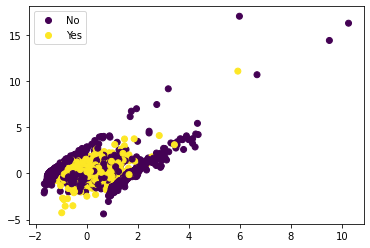

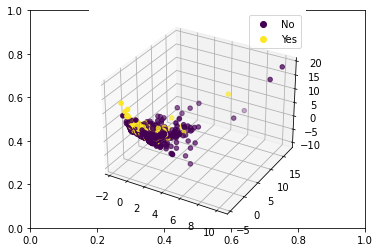

In [20]:
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)

Original images for visualization to check against.

![]( ./visualize_2D_plots_check.png "2D visualization check")
![]( ./visualize_3D_plots_check.png "2D visualization check")

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the **random state** for spliting at **0**
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( do you consider data is balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [21]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

    if standardize == True:
        pipe = make_pipeline(
            StandardScaler(), 
            LogisticRegression(class_weight='balanced', random_state = 0))
    else:
        pipe = make_pipeline(
            LogisticRegression(class_weight='balanced', random_state = 0))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(classification_report(y_true = y_test, y_pred = y_pred))

Now apply the pipeline on the all the features `X` and review the performance

In [22]:
train(X, y, standardize = True)
print('\n\n')
train(X, y, standardize = False)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000




              precision    recall  f1-score   support

           0       0.98      0.40      0.57       649
           1       0.47      0.99      0.64       351

    accuracy                           0.61      1000
   macro avg       0.73      0.70      0.61      1000
weighted avg       0.81      0.61      0.60      1000



In [23]:
# # YOUR CODE HERE

# # Given output for comparison

#              precision    recall  f1-score   support

#            0       0.75      0.77      0.76       649
#            1       0.55      0.52      0.54       351

#     accuracy                           0.68      1000
#    macro avg       0.65      0.65      0.65      1000
# weighted avg       0.68      0.68      0.68      1000


Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [24]:
# YOUR CODE HERE
train(X_reduced, y, standardize = True)
print('\n\n')
train(X_reduced, y, standardize = False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.49      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000




              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.49      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    * With the reduced data set, it doesn't matter whether the data is standardized as the data has already undergone a standardization and principle component reduction.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [28]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [36]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters = k, random_state = 10).fit(X) # YOUR CODE HERE
        inertias.append(kmeans.inertia_) # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')


#   kmeans = KMeans(n_clusters = k, random_state = 10).fit(X) # YOUR CODE HERE
#         inertias.append(kmeans.inertia_) # YOUR CODE HERE


3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

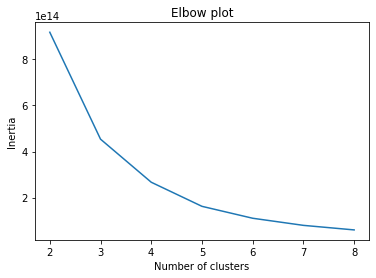

In [38]:
# YOUR CODE HERE 
visualize_elbow(X, ks = range(2,9))

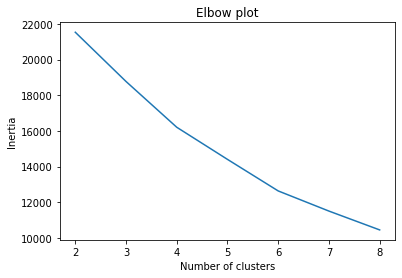

In [42]:
visualize_elbow(X_reduced, ks = range(2,9))

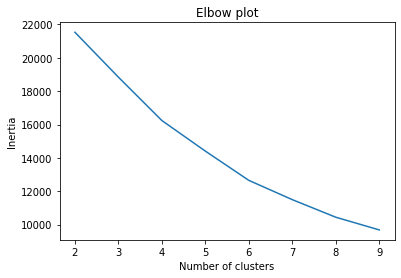

In [ ]:
# PLOT FOR COMPARISON

4. What are the disadvantage to use the Elbow method? 
    * The Elbow plot is a nice visual, but the decision on whether to use a particular number of clusters can be argued as a matter of taste. Using the data set `X`, the [threshold of change](https://medium.com/swlh/how-to-choose-the-right-number-of-clusters-in-the-k-means-algorithm-9160c57ec760) in the elbow plot could be argued to be between 3 and 5. Using the data set `X_reduced`, the bends in the curve appear very gradual and there is no clear threshold of change. I would make a guess at 4 clusters.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [43]:
from utils import visualize_silhouette

Note to self: Read [how to interpret](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) the silhouette score plots to better understand the interpretation.

For n_clusters = 2 The average silhouette_score is : 0.20000076688619875
For n_clusters = 3 The average silhouette_score is : 0.21024389546644387
For n_clusters = 4 The average silhouette_score is : 0.21948064643364978
For n_clusters = 5 The average silhouette_score is : 0.2251194443917191
For n_clusters = 6 The average silhouette_score is : 0.21140126806769122
For n_clusters = 7 The average silhouette_score is : 0.21261668185265153
For n_clusters = 8 The average silhouette_score is : 0.22080792678147063


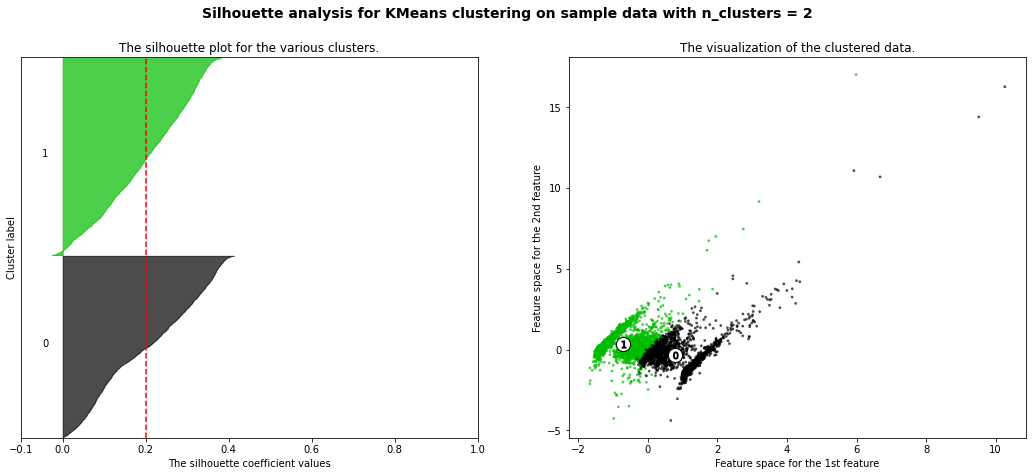

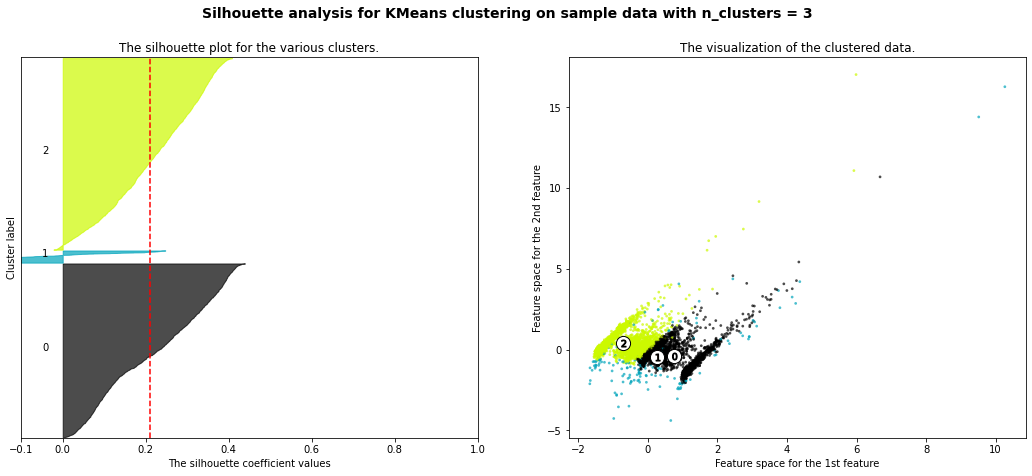

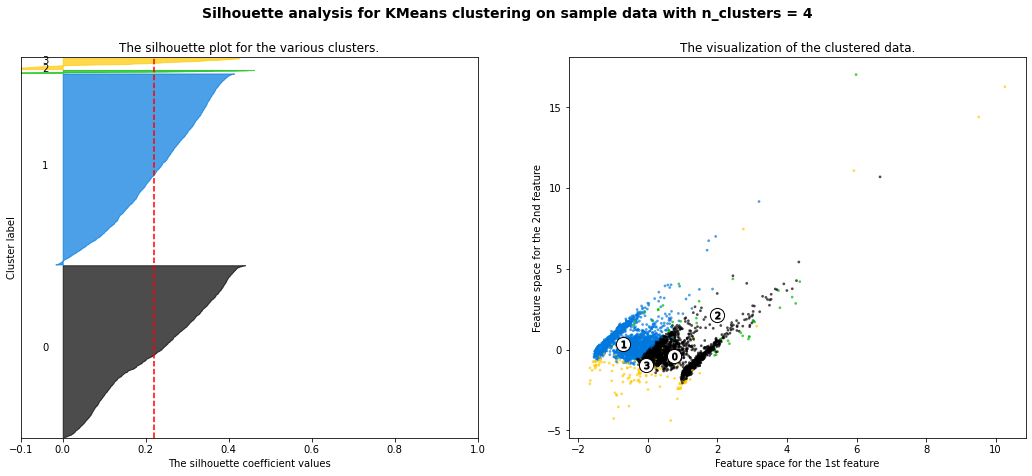

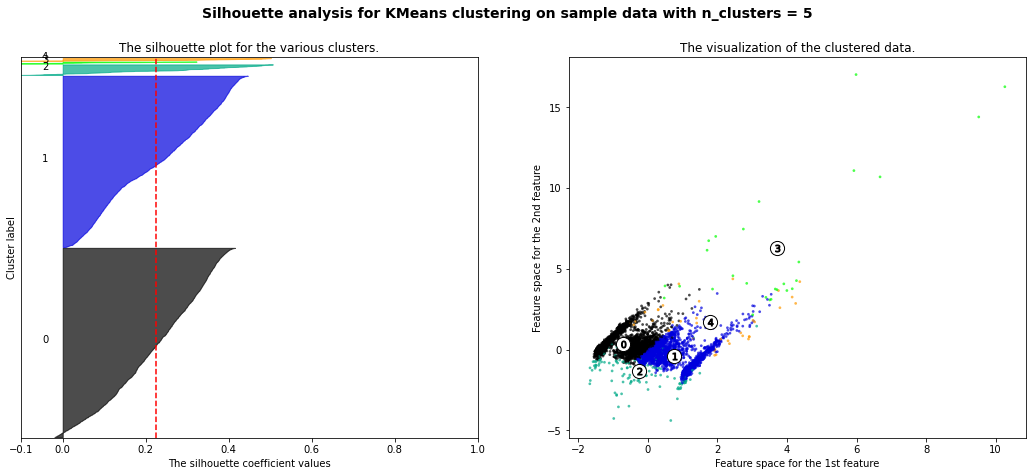

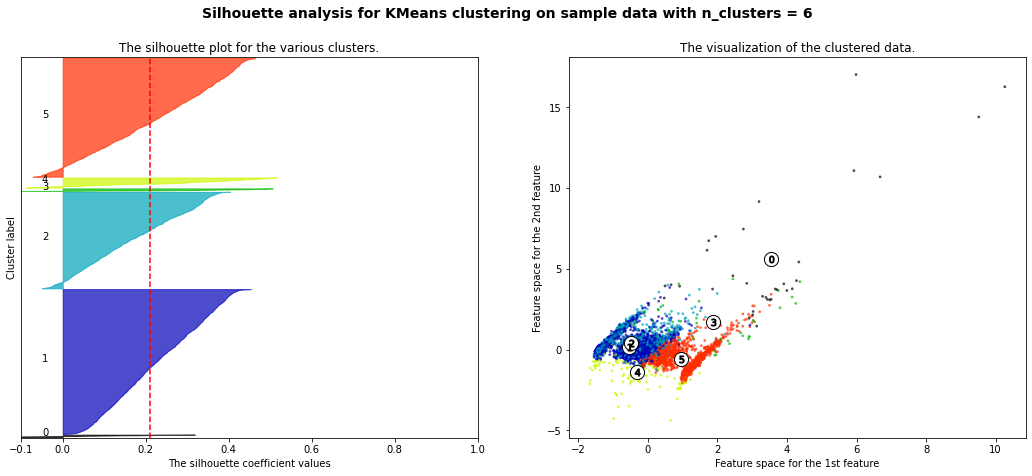

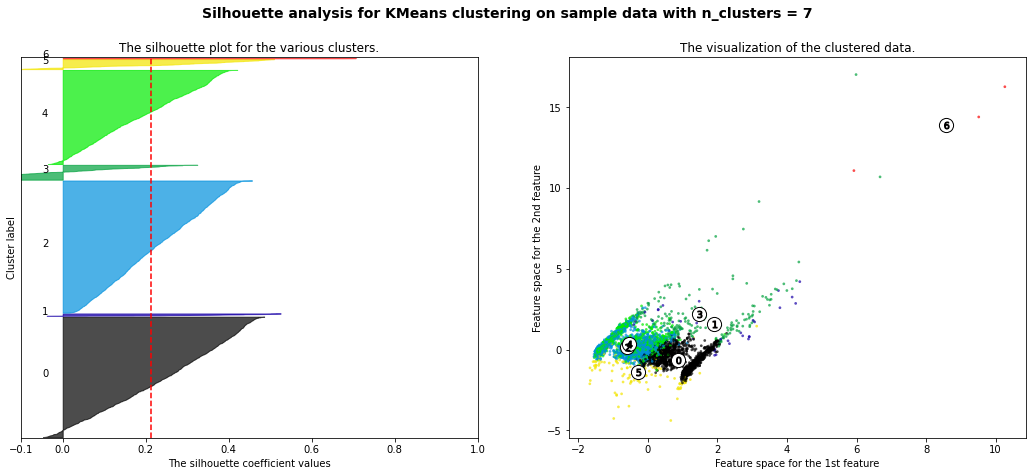

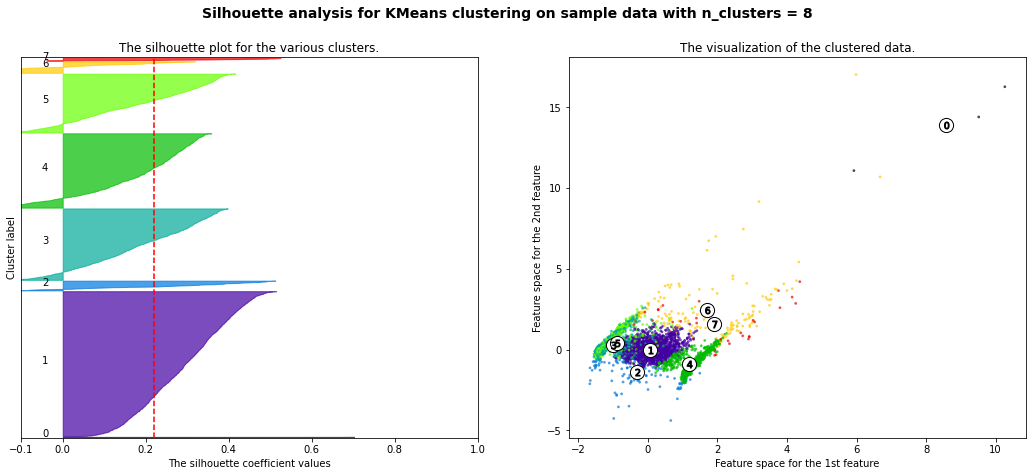

In [45]:
visualize_silhouette(max_clusters = 8, X = X_reduced)

For n_clusters = 2 The average silhouette_score is : 0.19919967382453047
For n_clusters = 3 The average silhouette_score is : 0.21238428422148908
For n_clusters = 4 The average silhouette_score is : 0.21846259845030108
For n_clusters = 5 The average silhouette_score is : 0.2055016602111605
For n_clusters = 6 The average silhouette_score is : 0.20861307391519884
For n_clusters = 7 The average silhouette_score is : 0.2137422138377995
For n_clusters = 8 The average silhouette_score is : 0.21817268912132334


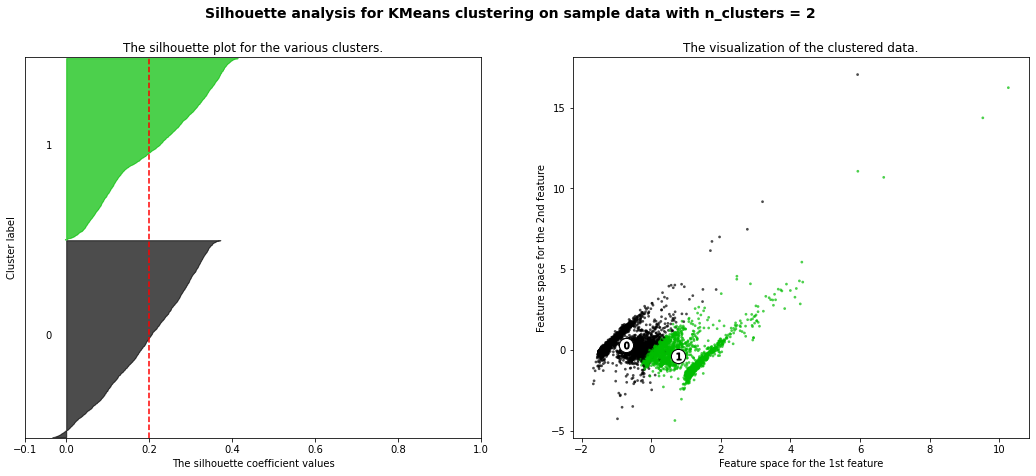

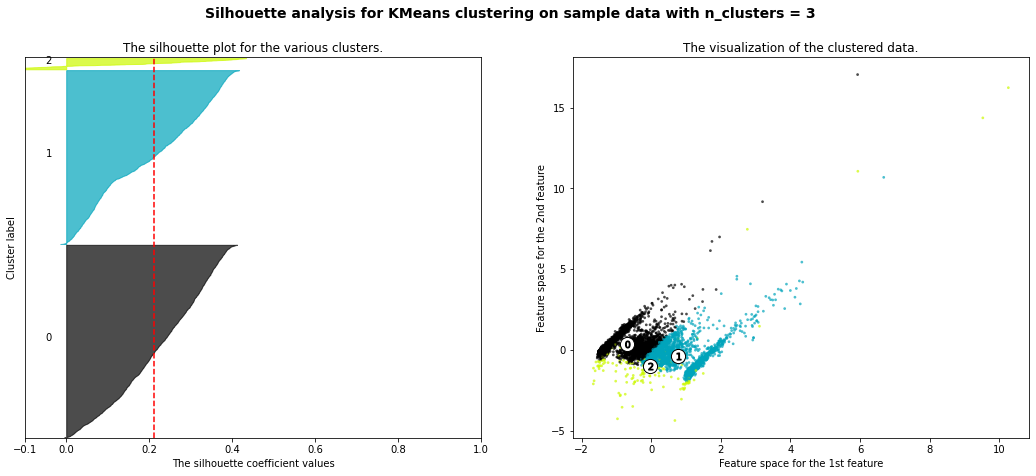

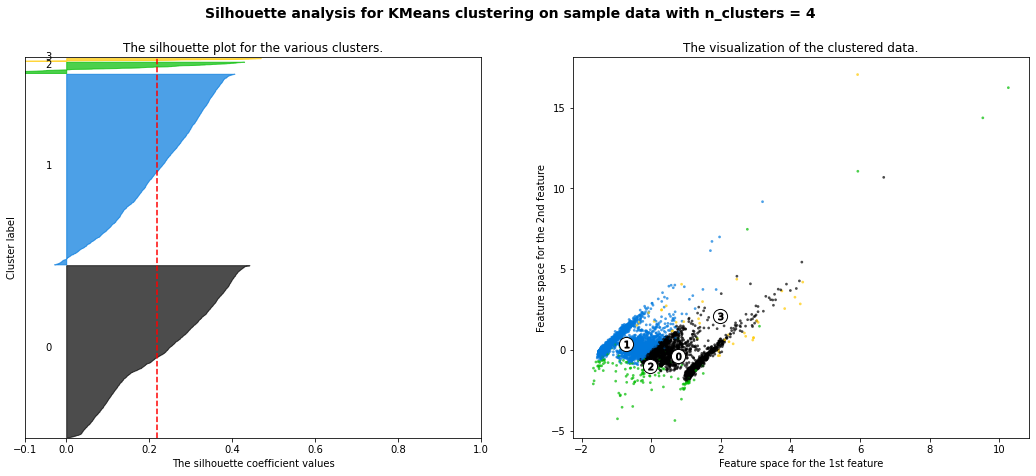

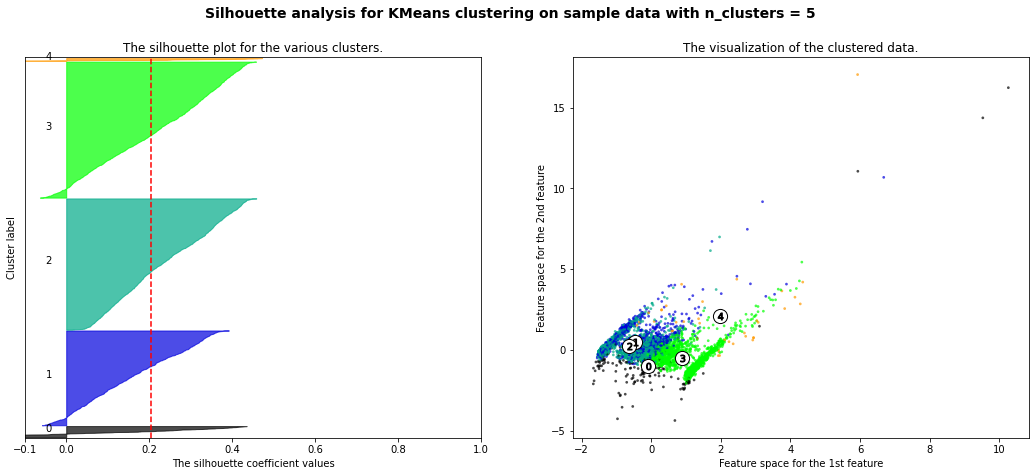

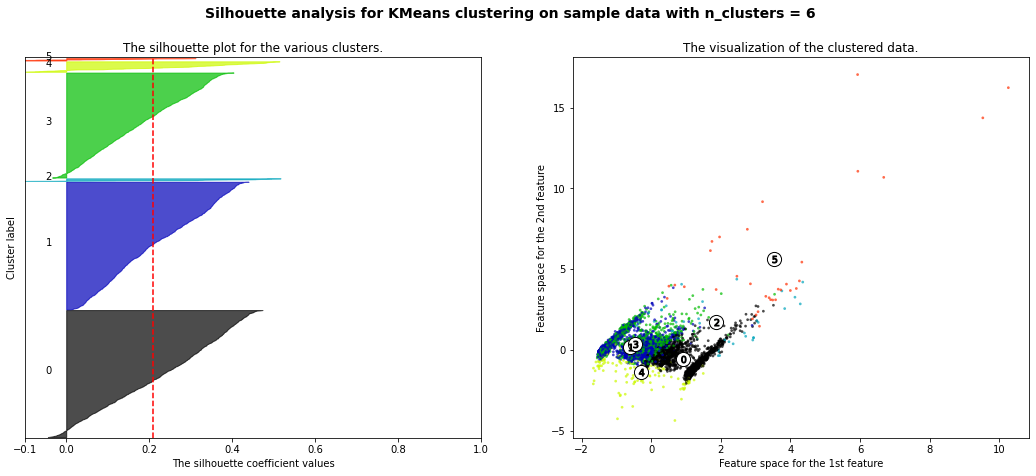

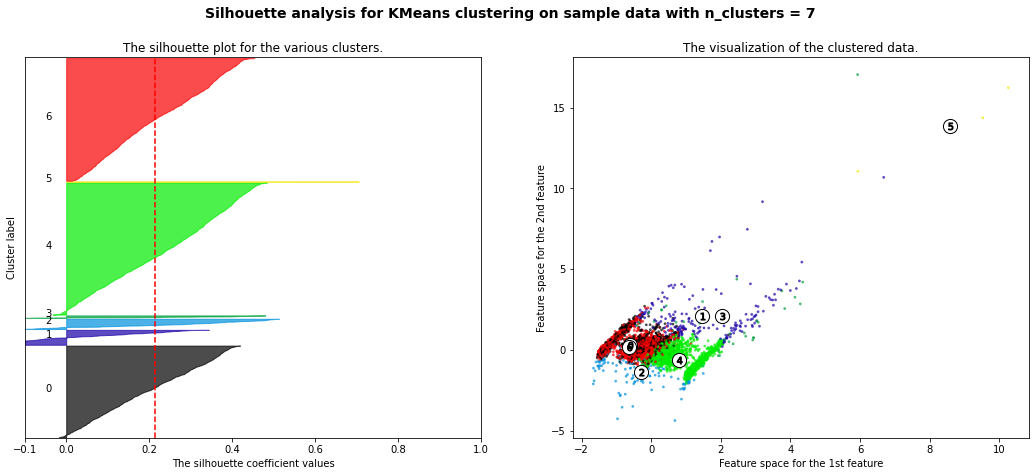

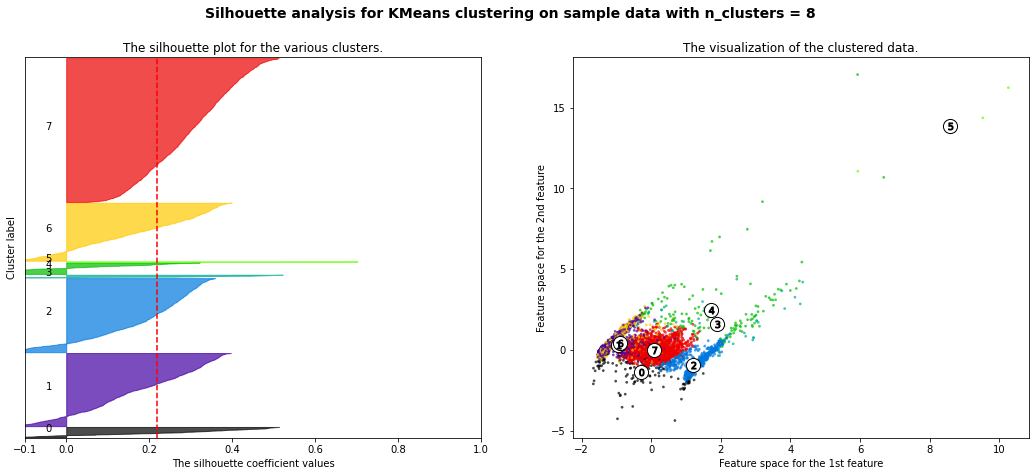

In [ ]:
# FOR COMPARISON

6. Instantiate a k-mean model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [53]:
# YOUR CODE HERE
km = KMeans(n_clusters = 4, random_state = 10)
predict_X_reduced = km.fit_predict(X_reduced)

In [ ]:
# Original for comparison 

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [65]:
# YOUR CODE HERE
print(len(X_reduced))
len0 = 0
len1 = 0
len2 = 0
len3 = 0
for i in range(len(predict_X_reduced)-1):
    if predict_X_reduced[i] == 0: len0 += 1
    if predict_X_reduced[i] == 1: len1 += 1
    if predict_X_reduced[i] == 2: len2 += 1
    if predict_X_reduced[i] == 3: len3 += 1

    
print('size of cluster 0 ' , len0)
print('size of cluster 1 ' , len1)
print('size of cluster 2 ' , len2)
print('size of cluster 3 ' , len3)


5000
size of cluster 0  2281
size of cluster 1  2534
size of cluster 2  37
size of cluster 3  147
[0 0 0 ... 0 0 1]


From the size of each cluster above, it looks like maybe there should only be two clusters.

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [ ]:
# YOUR CODE HERE

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [ ]:
# YOUR CODE HERE

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

In [ ]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert new.shape == (30091, 5)

In [ ]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.62,7.62,0,1.00
1,5870408,6.27,6.27,0,3.00
2,5900580,10.01,10.01,0,1.00
3,5918778,5.98,5.98,0,2.50
4,5848772,26.83,26.83,0,1.00


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [ ]:
# YOUR CODE HERE

Number of product ids in both past and new data: 0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [ ]:
# YOUR CODE HERE # ~.344

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [ ]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [ ]:
# YOUR CODE HERE

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [ ]:
semi_sup_preds = # YOUR CODE HERE

In [ ]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [ ]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.93      0.87     19732
           1       0.83      0.62      0.71     10359

    accuracy                           0.83     30091
   macro avg       0.83      0.78      0.79     30091
weighted avg       0.83      0.83      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)